In [1]:
from slepy import SLECalculator
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt

In [4]:
# Using MAR background SMB
path = Path('/Users/jonniebarnsley/Downloads/control_attempt_2')
outpath = Path('/Users/jonniebarnsley/Downloads/control_attempt_2/sle_results.nc')
if outpath.exists():
    old_sle = xr.load_dataarray(outpath)
else:
    with SLECalculator(quiet=True) as calc:
        old_sle = calc.process_ensemble(
            path / 'combined', 
            basins_file='/Users/jonniebarnsley/data/masks/zwally_basins_8km.nc'
        )
        old_sle.to_netcdf(outpath)

In [5]:
# Using synthetic background SMB
path = Path('/Users/jonniebarnsley/Downloads/control_synthetic_smb')
outpath = Path('/Users/jonniebarnsley/Downloads/control_synthetic_smb/sle_results.nc')
if outpath.exists():
    new_sle = xr.load_dataarray(outpath)
else:
    with SLECalculator(quiet=True) as calc:
        new_sle = calc.process_ensemble(
            path / 'combined', 
            basins_file='/Users/jonniebarnsley/data/masks/zwally_basins_8km.nc'
        )
        new_sle.to_netcdf(outpath)

Text(0.5, 0.98, 'Antarctic Sea level contribution')

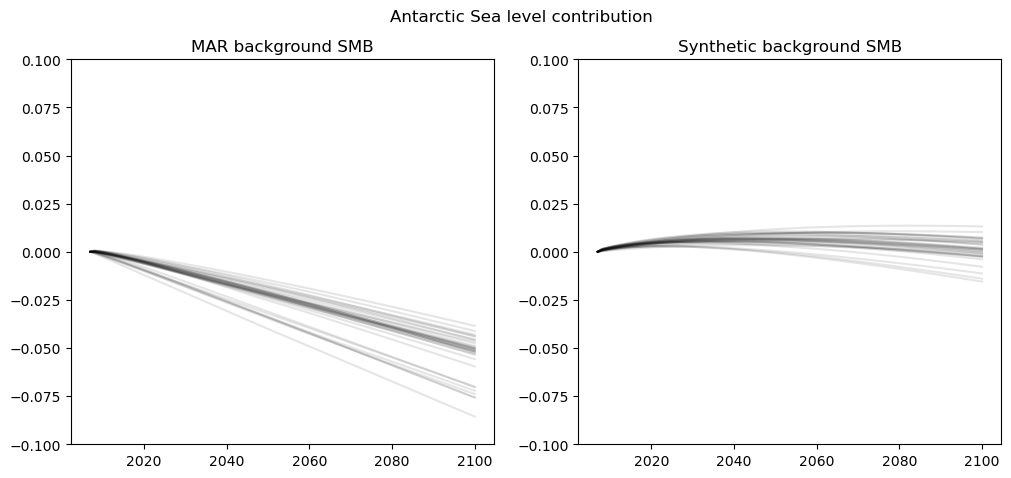

In [7]:
total_MAR = old_sle.sum(dim='basins')
total_syn = new_sle.sum(dim='basins')

fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

for run in total_MAR.run:
    axes[0].plot(total_MAR.time, total_MAR.sel(run=run), color='black', alpha=0.1)
    axes[1].plot(total_syn.time, total_syn.sel(run=run), color='black', alpha=0.1)

for ax in axes:
    ax.set_ylim(-0.1, 0.1)

axes[0].set_title('MAR background SMB')
axes[1].set_title('Synthetic background SMB')

fig.suptitle('Antarctic Sea level contribution')

Text(0.5, 0.98, 'WAIS Sea level contribution')

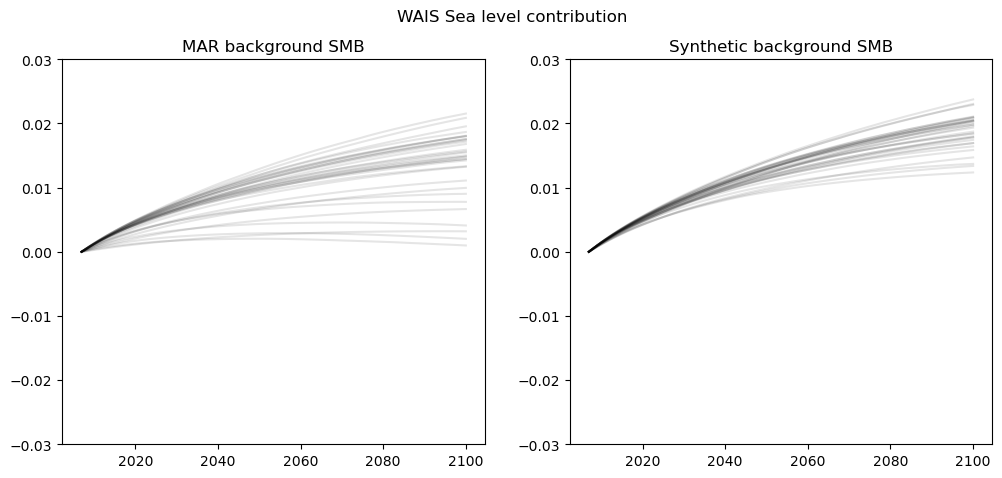

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

wais_MAR = old_sle.sel(basins=slice(18, 23)).sum(dim='basins') + old_sle.sel(basins=1)
wais_syn = new_sle.sel(basins=slice(18, 23)).sum(dim='basins') + new_sle.sel(basins=1)

for run in wais_MAR.run:
    axes[0].plot(wais_MAR.time, wais_MAR.sel(run=run), color='black', alpha=0.1)
    axes[1].plot(wais_syn.time, wais_syn.sel(run=run), color='black', alpha=0.1)

for ax in axes:
    ax.set_ylim(-0.03, 0.03)

axes[0].set_title('MAR background SMB')
axes[1].set_title('Synthetic background SMB')
fig.suptitle('WAIS Sea level contribution')

Text(0.5, 0.98, 'EAIS Sea level contribution')

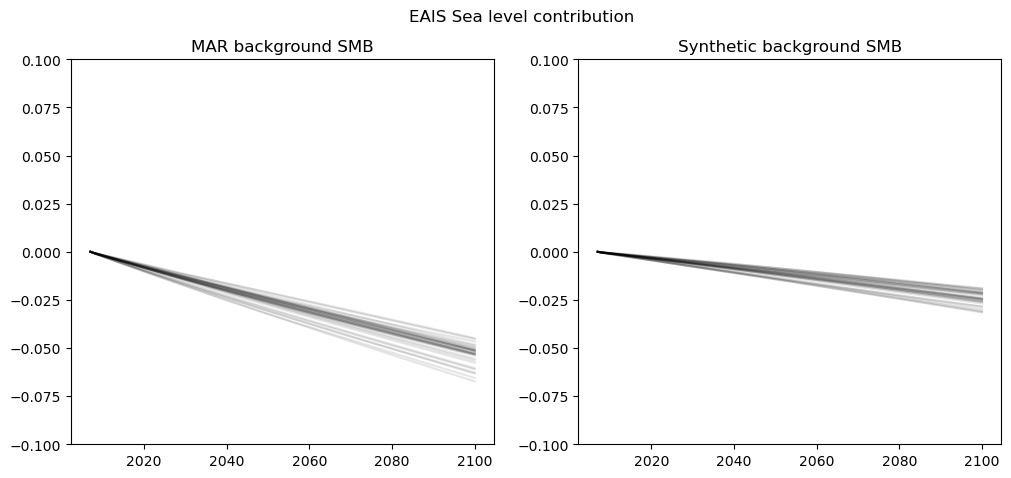

In [9]:
eais_MAR = old_sle.sel(basins=slice(2, 17)).sum(dim='basins')
eais_syn = new_sle.sel(basins=slice(2, 17)).sum(dim='basins')
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

for run in eais_MAR.run:
    axes[0].plot(eais_MAR.time, eais_MAR.sel(run=run), color='black', alpha=0.1)
    axes[1].plot(eais_syn.time, eais_syn.sel(run=run), color='black', alpha=0.1)

for ax in axes:
    ax.set_ylim(-0.1, 0.1)

axes[0].set_title('MAR background SMB')
axes[1].set_title('Synthetic background SMB')
fig.suptitle('EAIS Sea level contribution')

Text(0.5, 0.98, 'APIS Sea level contribution')

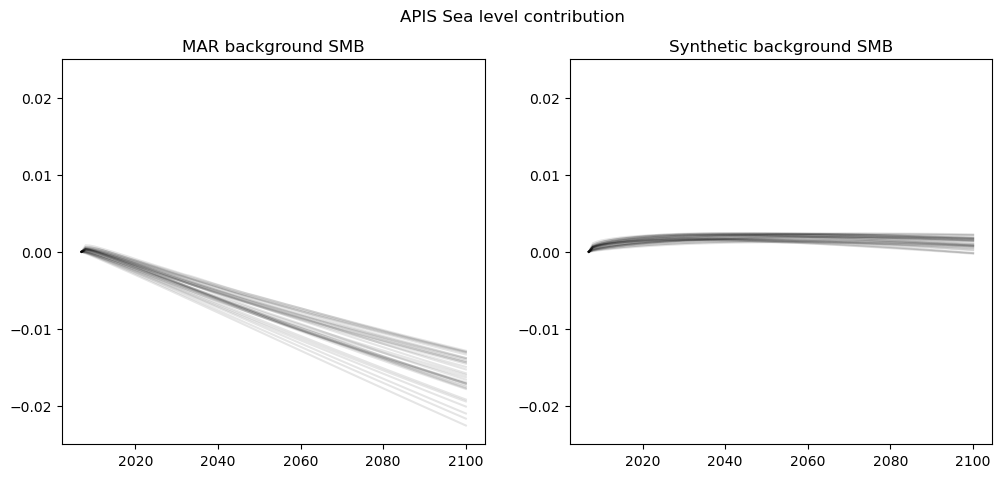

In [10]:
apis_MAR = old_sle.sel(basins=slice(24, 27)).sum(dim='basins')
apis_syn = new_sle.sel(basins=slice(24, 27)).sum(dim='basins')
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

for run in apis_MAR.run:
    axes[0].plot(apis_MAR.time, apis_MAR.sel(run=run), color='black', alpha=0.1)
    axes[1].plot(apis_syn.time, apis_syn.sel(run=run), color='black', alpha=0.1)

for ax in axes:
    ax.set_ylim(-0.025, 0.025)

axes[0].set_title('MAR background SMB')
axes[1].set_title('Synthetic background SMB')
fig.suptitle('APIS Sea level contribution')

In [12]:
import pandas as pd
# PPE samples
sobol = pd.read_csv('notebooks/control/sobol_samples.csv')
sobol = sobol[:32]

Text(0.5, 0.98, 'MAR background: Total Sea Level Rise vs Model Parameters')

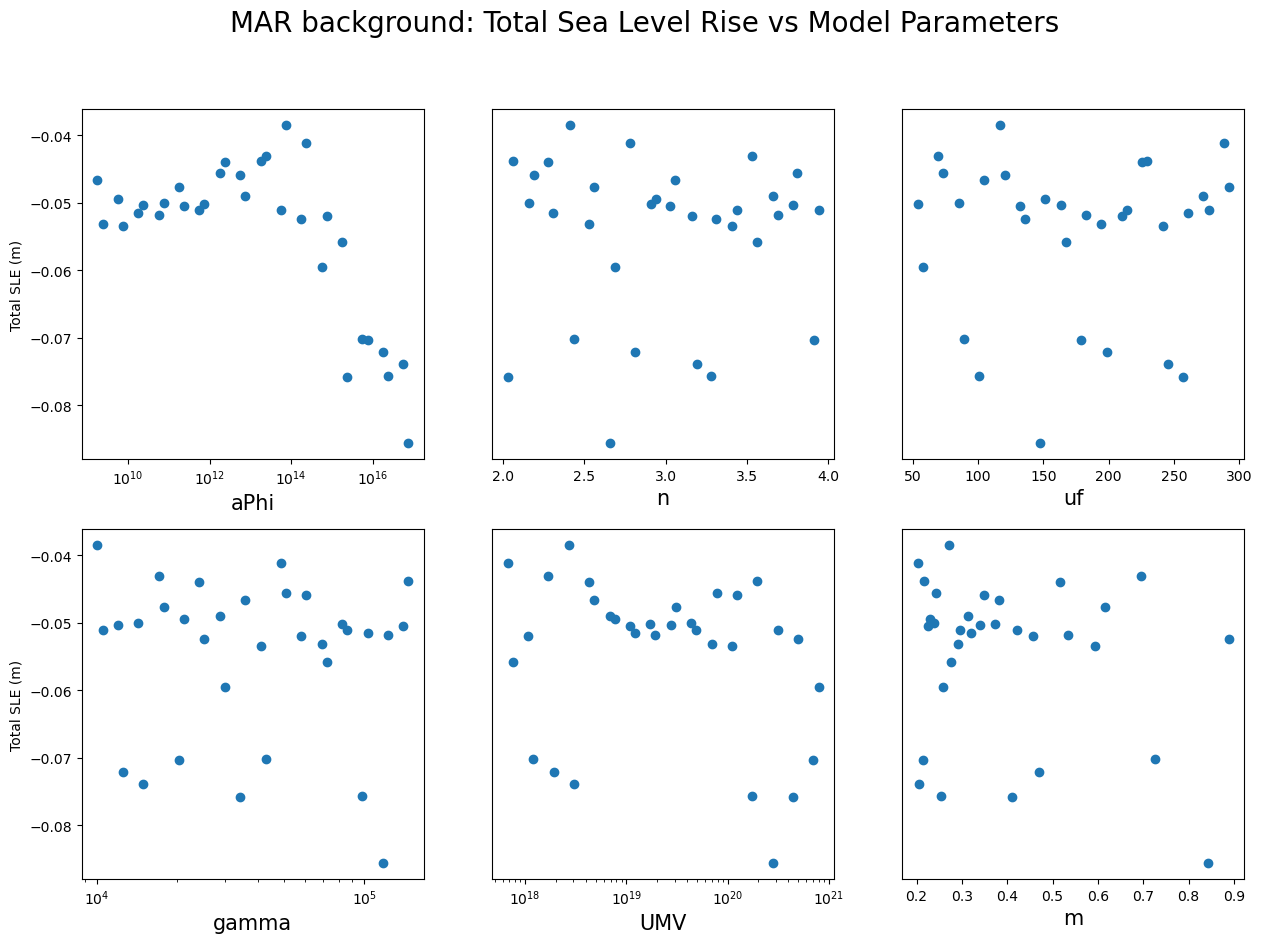

In [13]:
# Sensitivity plots (MAR)
final_sle = total_MAR.isel(time=-1).values
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
params = ['aPhi', 'n', 'uf', 'gamma', 'UMV', 'm']
for ax, var in zip(axes.flatten(), params):
    ax.scatter(sobol[var], final_sle)
    ax.set_xlabel(var, fontsize=15)
    
axes[0][0].set_ylabel('Total SLE (m)')
axes[1][0].set_ylabel('Total SLE (m)')
axes[0][0].set_xscale('log')
axes[1][0].set_xscale('log')
axes[1][1].set_xscale('log')
for i, j in [(0, 1), (1, 1), (0, 2), (1, 2)]:
    axes[i][j].set_yticks([])

fig.suptitle('MAR background: Total Sea Level Rise vs Model Parameters', fontsize=20)

Text(0.5, 0.98, 'Synthetic background: Total Sea Level Rise vs Model Parameters')

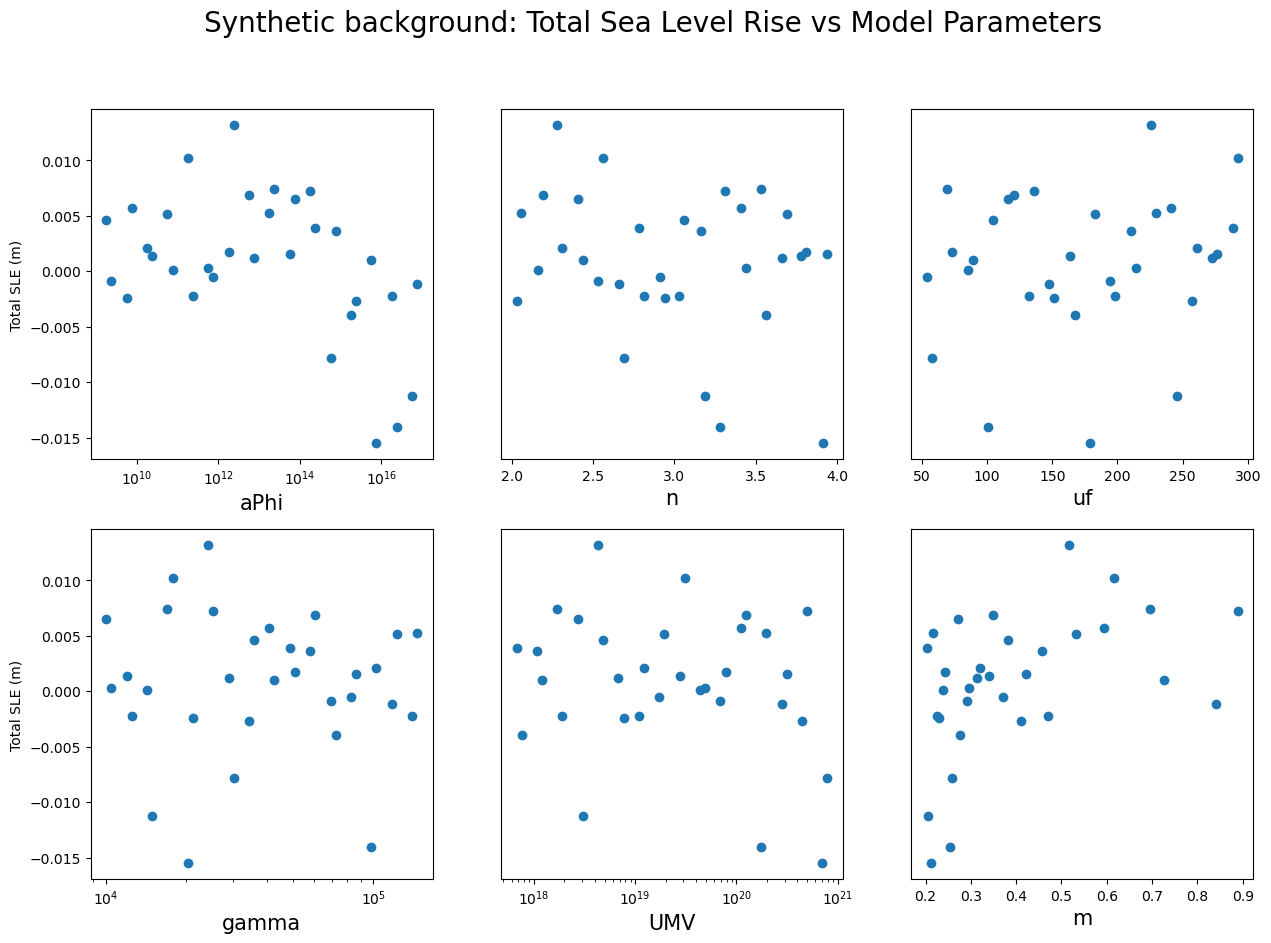

In [14]:
# Sensitivity plots (synthetic)
final_sle = total_syn.isel(time=-1).values
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
params = ['aPhi', 'n', 'uf', 'gamma', 'UMV', 'm']
for ax, var in zip(axes.flatten(), params):
    ax.scatter(sobol[var], final_sle)
    ax.set_xlabel(var, fontsize=15)
    
axes[0][0].set_ylabel('Total SLE (m)')
axes[1][0].set_ylabel('Total SLE (m)')
axes[0][0].set_xscale('log')
axes[1][0].set_xscale('log')
axes[1][1].set_xscale('log')
for i, j in [(0, 1), (1, 1), (0, 2), (1, 2)]:
    axes[i][j].set_yticks([])

fig.suptitle('Synthetic background: Total Sea Level Rise vs Model Parameters', fontsize=20)

In [47]:
dthk_datasets = []
thk_path = Path('/Users/jonniebarnsley/Downloads/control_synthetic_smb/thickness')
for file in thk_path.glob('*.nc'):
    ds = xr.open_dataset(file)
    thk = ds.thickness
    dthk = thk.isel(time=-1) - thk.isel(time=0)
    dthk_datasets.append(dthk)
combined = xr.concat(dthk_datasets, dim='run')
combined = combined.assign_coords(run=range(len(dthk_datasets)))

In [48]:
mean_dthk = combined.mean(dim='run')
std_dthk = combined.std(dim='run')

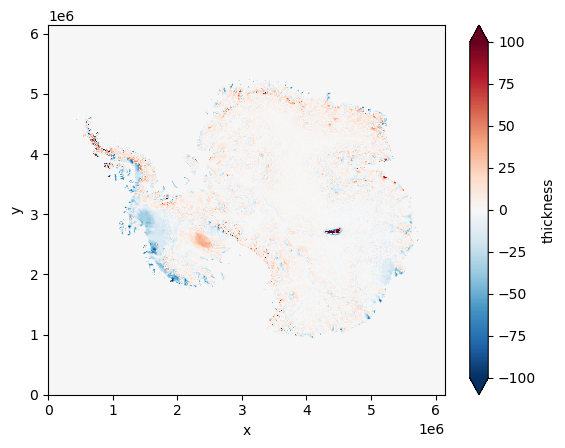

In [52]:
mean_dthk.plot(vmin=-100, vmax=100, cmap='RdBu_r')

In [4]:
dthk_datasets = []
thk_path = Path('/Users/jonniebarnsley/Downloads/control_attempt_2/Z_surface')
for file in thk_path.glob('*.nc'):
    ds = xr.open_dataset(file)
    thk = ds.Z_surface
    dthk = thk.isel(time=-1) - thk.isel(time=0)
    dthk_datasets.append(dthk)
combined = xr.concat(dthk_datasets, dim='run')
combined = combined.assign_coords(run=range(len(dthk_datasets)))

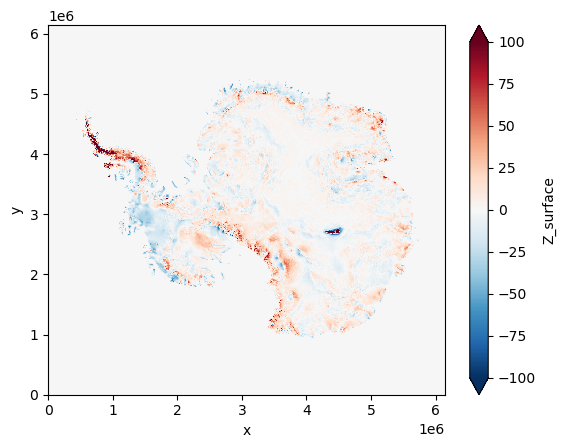

In [5]:
combined.mean(dim='run').plot(vmin=-100, vmax=100, cmap='RdBu_r')

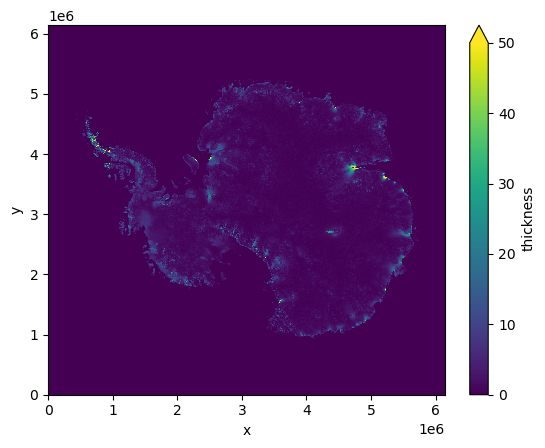

In [53]:
std_dthk.plot(vmin=0, vmax=50, cmap='viridis')

In [21]:
du_datasets = []
xVel_path = Path('/Users/jonniebarnsley/Downloads/control_synthetic_smb/xVel')
yVel_path = Path('/Users/jonniebarnsley/Downloads/control_synthetic_smb/yVel')
for xfile, yfile in zip(xVel_path.glob('*.nc'), yVel_path.glob('*.nc')):
    
    xds = xr.open_dataset(xfile)
    yds = xr.open_dataset(yfile)
    xVel = xds.xVel
    yVel = yds.yVel
    u = (xVel**2 + yVel**2)**0.5
    du = u.isel(time=15) - u.isel(time=0)
    du_datasets.append(du)

combined_u = xr.concat(du_datasets, dim='run')
combined_u = combined_u.assign_coords(run=range(len(du_datasets)))
mean_du = combined_u.mean(dim='run')
std_du = combined_u.std(dim='run')

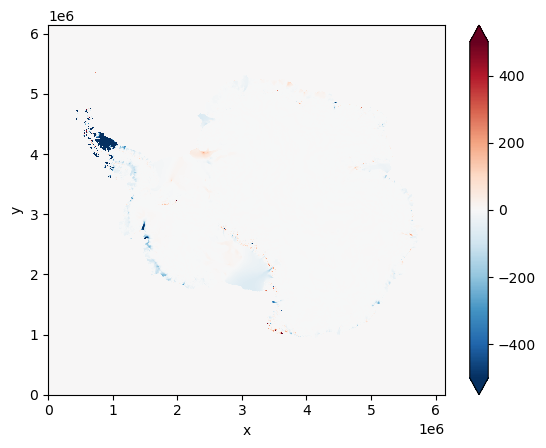

In [22]:
mean_du.plot(vmin=-500, vmax=500, cmap='RdBu_r')

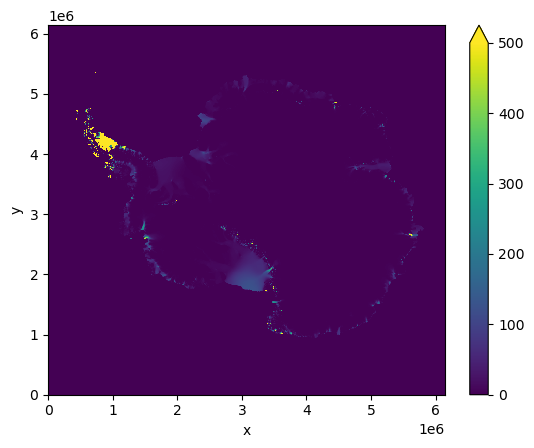

In [25]:
std_du.plot(vmax=500)

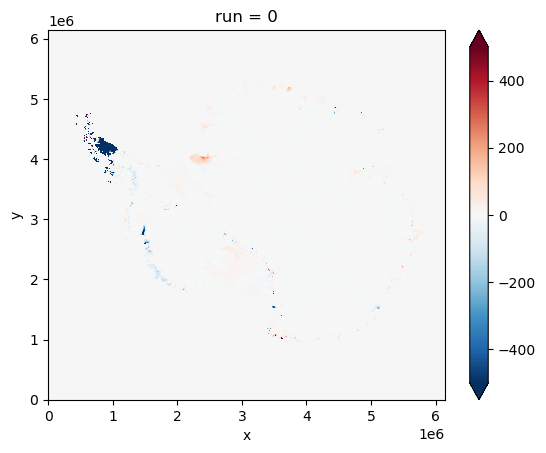

In [28]:
combined_u.isel(run=0).plot(vmin=-500, vmax=500, cmap='RdBu_r')

In [7]:
du_datasets = []
xVel_path = Path('/Users/jonniebarnsley/Downloads/control_attempt_2/xVel')
yVel_path = Path('/Users/jonniebarnsley/Downloads/control_attempt_2/yVel')
for xfile, yfile in zip(xVel_path.glob('*.nc'), yVel_path.glob('*.nc')):
    
    xds = xr.open_dataset(xfile)
    yds = xr.open_dataset(yfile)
    xVel = xds.xVel
    yVel = yds.yVel
    u = (xVel**2 + yVel**2)**0.5
    du = u.isel(time=1) - u.isel(time=0)
    du_datasets.append(du)

combined_u = xr.concat(du_datasets, dim='run')
combined_u = combined_u.assign_coords(run=range(len(du_datasets)))
mean_du = combined_u.mean(dim='run')
std_du = combined_u.std(dim='run')

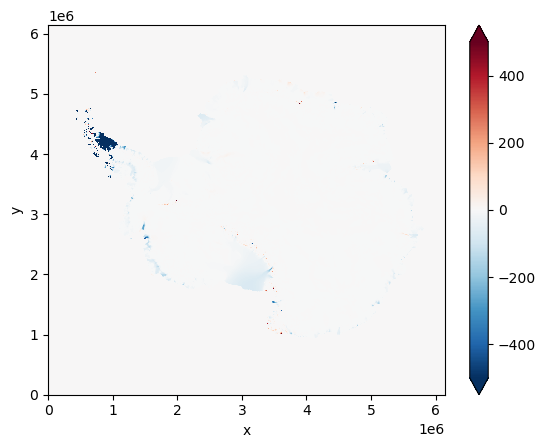

In [8]:
mean_du.plot(vmin=-500, vmax=500, cmap='RdBu_r')

In [2]:
u_datasets = []
xVel_path = Path('/Volumes/LaCie/inversions/ppe/0lev/xVel')
yVel_path = Path('/Volumes/LaCie/inversions/ppe/0lev/yVel')

for xfile, yfile in zip(xVel_path.glob('*run001*.nc'), yVel_path.glob('*run001*.nc')):
    
    xds = xr.open_dataset(xfile)
    yds = xr.open_dataset(yfile)
    xVel = xds.xVel
    yVel = yds.yVel
    u = (xVel**2 + yVel**2)**0.5
    u_datasets.append(u)

combined_u = xr.concat(u_datasets, dim='run')
combined_u = combined_u.assign_coords(run=range(len(u_datasets)))
mean_u = combined_u.mean(dim='run')
std_u = combined_u.std(dim='run')

In [3]:
from lib.animation import animate

animation = animate(u, vmin=-100, vmax=100, cmap='RdBu_r')

In [4]:
from IPython.display import HTML
HTML(animation.to_jshtml())

AttributeError: Rectangle.set() got an unexpected keyword argument 'vmin'